In [1]:
# pip install git+https://github.com/AltamarMx/iertools.git


In [2]:
nombres = {
 'Environment:Site Outdoor Air Drybulb Temperature (C)': 'To',
 'Environment:Site Outdoor Air Wetbulb Temperature (C)': 'Environment:Site Outdoor Air Wetbulb Temperature (C)',
 'Environment:Site Outdoor Air Relative Humidity (%)': 'hr',
 'Environment:Site Outdoor Air Barometric Pressure (Pa)': 'Environment:Site Outdoor Air Barometric Pressure (Pa)',
 'Environment:Site Wind Speed (m/s)': 'ws',
 'Environment:Site Wind Direction (deg)': 'wd',
 'EVAPZONE:Zone Mean Air Temperature (C)': 'Ti_EVAPZONE',
 'EVAPZONE2:Zone Mean Air Temperature (C)': 'Ti_EVAPZONE2',
 'EVAPZONE2:Zone Air Relative Humidity (%)':"hr_celosia",
 'EVAPZONE:Zone Air Relative Humidity (%)':"hr_entrada",
 'N1:Zone Mean Air Temperature (C)': 'Ti_N1',
 'N2:Zone Mean Air Temperature (C)': 'Ti_N2',
 'NCAFETERIA:Zone Mean Air Temperature (C)': 'Ti',
 'NCAFETERIA_COCINA:Zone Mean Air Temperature (C)': 'Ti_NCAFETERIA_COCINA',
 'NS:Zone Mean Air Temperature (C)': 'Ti_NS',
 'NS_PLAZA:Zone Mean Air Temperature (C)': 'Ti_NS_PLAZA',
 'EVAPZONE_WE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)': 'Qentrada_out',
 'EVAPZONE_WE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)': 'Qentrada_in',
 'EVAPZONE2_WOESTE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)': 'Qcelosia_out',
 'EVAPZONE2_WOESTE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)': 'Qcelosia_in',
 'NCAFETERIA_VENTANAOESTE:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)':"Qcafe_celosia_out",
 'NCAFETERIA_VENTANAOESTE:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)':"Qcafe_celosia_in",
 'NCAFETERIA_ENTRADA:AFN Linkage Node 1 to Node 2 Volume Flow Rate (m3/s)':"Qcafe_entrada_out",
 'NCAFETERIA_ENTRADA:AFN Linkage Node 2 to Node 1 Volume Flow Rate (m3/s)':"Qcafe_entrada_in"         
}
        

In [3]:
import pandas as pd
from iertools.read import read_sql
from dateutil.parser import parse
import matplotlib.pyplot as plt
# Linkage 1 to 2, thermal zone to outdoor

In [4]:
# columnas = data.columns
# [col for col in columnas if "NCafeteria_Entrada".upper() in col ]

In [5]:
f = "../idf/cafeteria_adiabatica/cafe.sql"
tmp = read_sql(f)
# nombres = tmp.rename_from_sql()
tmp.rename(columns=nombres)
data = tmp.data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


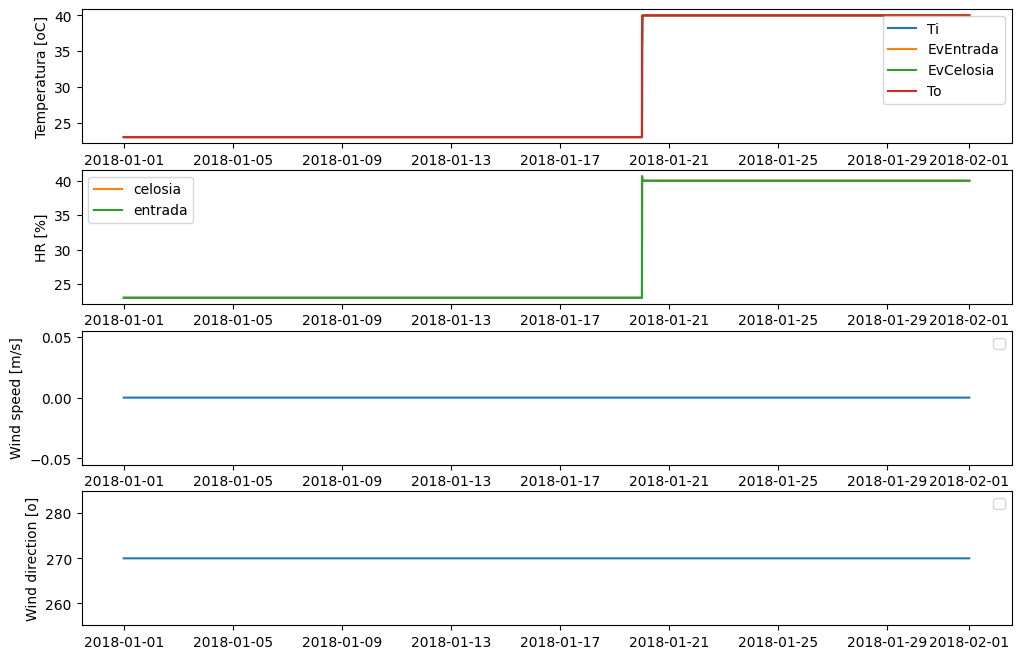

In [6]:
f1 = parse("2018-01-01")
f2 = f1 + pd.Timedelta("5D")

fig, ax = plt.subplots(4,figsize=(12,8))

ax[0].set_ylabel("Temperatura [oC]")
ax[0].plot(data.Ti,label="Ti")
ax[0].plot(data.Ti_EVAPZONE,label="EvEntrada")
ax[0].plot(data.Ti_EVAPZONE2,label="EvCelosia")
ax[0].plot(data.To,label="To")

ax[1].set_ylabel("HR [%]")
ax[1].plot(data.hr)
ax[1].plot(data.hr_celosia,label="celosia")
ax[1].plot(data.hr_entrada,label="entrada")

ax[2].set_ylabel("Wind speed [m/s]")
ax[2].plot(data.ws)

ax[3].set_ylabel("Wind direction [o]")
ax[3].plot(data.wd)

for a in ax:
#     a.set_xlim(f1,f2)
    a.legend()

In [7]:
# Celosia
# Qcelosia_in, Qcelosia_out
# Qcafe_celosia_out, Qcafe_celosia_in
# Qcafe_entrada_out, Qcafe_entrada_in
# Qentrada_out, Qentrada_in


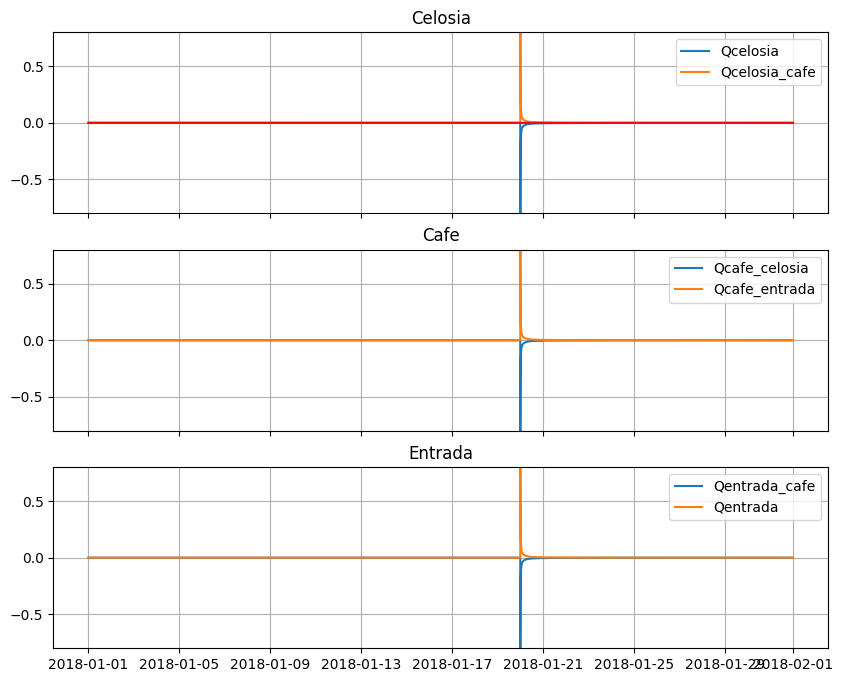

In [8]:

fig, ax = plt.subplots(3,figsize=(10,8),sharex=True)

Qcelosia = data.Qcelosia_in-data.Qcelosia_out
Qcelosia_cafe = data.Qcafe_celosia_out-data.Qcafe_celosia_in
ax[0].set_title("Celosia")
ax[0].plot(Qcelosia,label="Qcelosia")
ax[0].plot(Qcelosia_cafe,label="Qcelosia_cafe")
ax[0].plot(Qcelosia+Qcelosia_cafe,"r-")


Qcafe_celosia = data.Qcafe_celosia_in-data.Qcafe_celosia_out
Qcafe_entrada = data.Qcafe_entrada_in-data.Qcafe_entrada_out
ax[1].set_title("Cafe")
ax[1].plot(Qcafe_celosia,label="Qcafe_celosia")
ax[1].plot(Qcafe_entrada,label="Qcafe_entrada")


Qentrada_cafe = data.Qcafe_entrada_out - data.Qcafe_entrada_in
Qentrada      = data.Qentrada_in - data.Qentrada_out

ax[2].set_title("Entrada")
ax[2].plot(Qentrada_cafe,label="Qentrada_cafe")
ax[2].plot(Qentrada,label="Qentrada")

for a in ax:
    a.legend()
#     a.set_xlim(f1,f2)
    a.set_ylim(-.8,.8)
    a.grid()
